# Proyecto Integrador de Aprendizaje Automático - Uso de Sci-Kit 

Construir un modelo de clasificación supervisada usando MLP (Multilayer Perceptron/Red Neuronal Multicapa) para predecir si un préstamo emitido por la plataforma Lending Club resultará en default (1) o será pagado completamente (0). Se comparará el desempeño de los modelos construidos con scikit-learn y PySpark. Además, se aplicará LIME para interpretar predicciones.

## Dataset

Nombre: Lending Club Loan Data (2007–2020)

Fuente: Kaggle Dataset - Lending Club

Tamaño: más de 1,3 millones de registros

Características: variables socioeconómicas, financieras, de crédito, empleo y propósito del préstamo

**Respuesta:**

Variable binaria: loan_status

0 = Fully Paid

1 = Charged Off (default)

Generar la variable default basada en la columna loan_status:

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns       
import warnings
warnings.filterwarnings('ignore')

import re
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression



In [2]:
# Load the dataset
df = pd.read_csv('C:/Users/elias/OneDrive/Desktop/MachineLearning/JBOOKS/Project1DL/accepted_2007_to_2018Q4.csv')

In [3]:
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260696,88985880,NaN,40000.0,40000.0,40000.0,60 months,10.49,859.56,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260697,88224441,NaN,24000.0,24000.0,24000.0,60 months,14.49,564.56,C,C4,...,NaN,NaN,Cash,Y,Mar-2019,ACTIVE,Mar-2019,10000.0,44.82,1.0
2260698,88215728,NaN,14000.0,14000.0,14000.0,60 months,14.49,329.33,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260699,Total amount funded in policy code 1: 1465324575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.drop(columns =['total_pymnt', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
                  'recoveries', 'last_pymnt_amnt', 'last_fico_range_high', 'last_fico_range_low',
                 'out_prncp',
                  'tax_liens', 'all_util', 'open_rv_12m', 'open_act_il', 'max_bal_bc', 'total_bal_il',
                  'acc_open_past_24mths'
                  ], inplace=True)
df.drop(columns=["out_prncp_inv", "total_pymnt_inv", "collection_recovery_fee","debt_settlement_flag"], inplace=True)

## EDA

In [5]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,NaN,Cash,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,NaN,Cash,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,NaN,Cash,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,NaN,Cash,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,NaN,Cash,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
"""idx_ls = df.columns.get_loc("loan_status")

df_pre = df.iloc[:, :idx_ls].copy()

print("Columnas antes de loan_status:", df_pre.columns.tolist())
print("Shape final:", df_pre.shape)"""

'idx_ls = df.columns.get_loc("loan_status")\n\ndf_pre = df.iloc[:, :idx_ls].copy()\n\nprint("Columnas antes de loan_status:", df_pre.columns.tolist())\nprint("Shape final:", df_pre.shape)'

In [7]:
df["default"] = df["loan_status"].apply(lambda x: 1 if x == "Charged Off" else 0)

In [8]:
df.drop(columns=["member_id"], inplace=True)

In [9]:
df

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,default
0,68407277,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,...,NaN,NaN,Cash,NaN,NaN,NaN,NaN,NaN,NaN,0
1,68355089,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,...,NaN,NaN,Cash,NaN,NaN,NaN,NaN,NaN,NaN,0
2,68341763,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,...,NaN,NaN,Cash,NaN,NaN,NaN,NaN,NaN,NaN,0
3,66310712,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,...,NaN,NaN,Cash,NaN,NaN,NaN,NaN,NaN,NaN,0
4,68476807,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,...,NaN,NaN,Cash,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260696,88985880,40000.0,40000.0,40000.0,60 months,10.49,859.56,B,B3,Vice President,...,NaN,NaN,Cash,NaN,NaN,NaN,NaN,NaN,NaN,0
2260697,88224441,24000.0,24000.0,24000.0,60 months,14.49,564.56,C,C4,Program Manager,...,NaN,NaN,Cash,Mar-2019,ACTIVE,Mar-2019,10000.0,44.82,1.0,1
2260698,88215728,14000.0,14000.0,14000.0,60 months,14.49,329.33,C,C4,Customer Service Technician,...,NaN,NaN,Cash,NaN,NaN,NaN,NaN,NaN,NaN,0
2260699,Total amount funded in policy code 1: 1465324575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [10]:
# --- 2. Información general ---
print("Tipos de datos y valores nulos:")
print(df.info())
print("\nValores faltantes:")
print(df.isnull().sum())

Tipos de datos y valores nulos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 131 entries, id to default
dtypes: float64(93), int64(1), object(37)
memory usage: 2.2+ GB
None

Valores faltantes:
id                             0
loan_amnt                     33
funded_amnt                   33
funded_amnt_inv               33
term                          33
                          ...   
settlement_date          2226455
settlement_amount        2226455
settlement_percentage    2226455
settlement_term          2226455
default                        0
Length: 131, dtype: int64


## Eliminación de columnas con mas del 50% de NA

In [11]:
import pandas as pd

threshold = 0.5  
na_ratio = df.isna().mean()
keep_cols = na_ratio[na_ratio <= threshold].index
df_filtered = df[keep_cols].copy()

print("Columnas originales:", df.shape[1])
print("Columnas eliminadas:", df.shape[1] - df_filtered.shape[1])
print("Columnas finales:", df_filtered.shape[1])

Columnas originales: 131
Columnas eliminadas: 43
Columnas finales: 88


## Eliminación de columnas tipo Object que tienen demasiadas categorías

In [12]:
df_filtered

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,default
0,68407277,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,...,76.9,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,0
1,68355089,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,...,97.4,7.7,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,0
2,68341763,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,...,100.0,50.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,0
3,66310712,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,...,100.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,N,Cash,0
4,68476807,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,...,96.6,60.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260696,88985880,40000.0,40000.0,40000.0,60 months,10.49,859.56,B,B3,Vice President,...,75.7,50.0,0.0,55970.0,28398.0,12300.0,42670.0,N,Cash,0
2260697,88224441,24000.0,24000.0,24000.0,60 months,14.49,564.56,C,C4,Program Manager,...,96.2,40.0,1.0,84664.0,62426.0,20700.0,58764.0,N,Cash,1
2260698,88215728,14000.0,14000.0,14000.0,60 months,14.49,329.33,C,C4,Customer Service Technician,...,81.8,50.0,0.0,163804.0,44215.0,9500.0,34169.0,N,Cash,0
2260699,Total amount funded in policy code 1: 1465324575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [13]:
cat_cols = df_filtered.select_dtypes(include=["object"]).columns.tolist()

In [14]:
from typing import Optional
import pandas as pd

def drop_high_cardinality_objects(
    df: pd.DataFrame,
    cat_cols: list,
    max_unique: int = 100,                 # umbral absoluto
    max_ratio: Optional[float] = None,    # umbral relativo
    count_na_as_category: bool = False
):

    # Cardinalidad por columna
    nun = df[cat_cols].nunique(dropna=not count_na_as_category)
    nrows = len(df)

    # Criterios
    to_drop_abs = nun[nun > max_unique].index
    to_drop = set(to_drop_abs)

    if max_ratio is not None and nrows > 0:
        ratios = nun / nrows
        to_drop_rel = ratios[ratios > max_ratio].index
        to_drop = to_drop.union(set(to_drop_rel))

    # DataFrame resumen
    summary = pd.DataFrame({
        "nunique": nun,
        "ratio": nun / nrows if nrows > 0 else float("nan"),
        "drop": nun.index.isin(to_drop)
    }).sort_values("nunique", ascending=False)

    df_out = df.drop(columns=to_drop)
    return df_out, summary, list(to_drop)


df_filtered, card_summary, dropped = drop_high_cardinality_objects(
    df_filtered, cat_cols=cat_cols, max_unique=100
)

print("Columnas eliminadas por alta cardinalidad:", dropped)

Columnas eliminadas por alta cardinalidad: ['issue_d', 'emp_title', 'last_pymnt_d', 'id', 'title', 'last_credit_pull_d', 'earliest_cr_line', 'zip_code', 'url']


In [15]:
print(card_summary) 


                     nunique         ratio   drop
id                   2260701  1.000000e+00   True
url                  2260668  9.999854e-01   True
emp_title             512694  2.267854e-01   True
title                  63154  2.793558e-02   True
zip_code                 956  4.228777e-04   True
earliest_cr_line         754  3.335249e-04   True
last_credit_pull_d       141  6.237003e-05   True
issue_d                  139  6.148535e-05   True
last_pymnt_d             136  6.015833e-05   True
addr_state                51  2.255937e-05  False
sub_grade                 35  1.548192e-05  False
purpose                   14  6.192769e-06  False
emp_length                11  4.865747e-06  False
loan_status                9  3.981066e-06  False
grade                      7  3.096385e-06  False
home_ownership             6  2.654044e-06  False
verification_status        3  1.327022e-06  False
term                       2  8.846813e-07  False
pymnt_plan                 2  8.846813e-07  False


In [16]:
df_filtered

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,default
0,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,10+ years,MORTGAGE,...,76.9,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,0
1,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,10+ years,MORTGAGE,...,97.4,7.7,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,0
2,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,10+ years,MORTGAGE,...,100.0,50.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,0
3,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,10+ years,MORTGAGE,...,100.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,N,Cash,0
4,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,3 years,MORTGAGE,...,96.6,60.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260696,40000.0,40000.0,40000.0,60 months,10.49,859.56,B,B3,9 years,MORTGAGE,...,75.7,50.0,0.0,55970.0,28398.0,12300.0,42670.0,N,Cash,0
2260697,24000.0,24000.0,24000.0,60 months,14.49,564.56,C,C4,6 years,RENT,...,96.2,40.0,1.0,84664.0,62426.0,20700.0,58764.0,N,Cash,1
2260698,14000.0,14000.0,14000.0,60 months,14.49,329.33,C,C4,10+ years,MORTGAGE,...,81.8,50.0,0.0,163804.0,44215.0,9500.0,34169.0,N,Cash,0
2260699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0



Distribución de 'default':
default
0    0.881205
1    0.118795
Name: proportion, dtype: float64


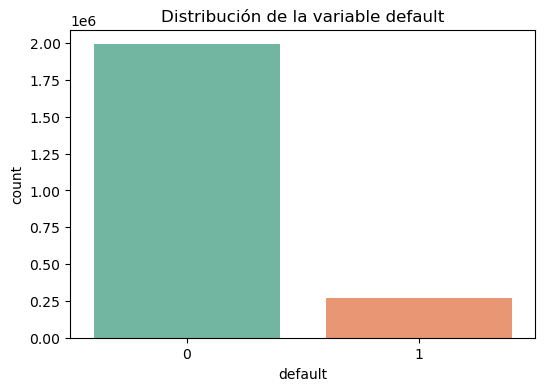

In [17]:
# --- 3. Distribución de la variable 'default' ---
print("\nDistribución de 'default':")
print(df['default'].value_counts(normalize=True))

plt.figure(figsize=(6,4))
sns.countplot(data=df, x="default", palette="Set2")
plt.title("Distribución de la variable default")
plt.show()

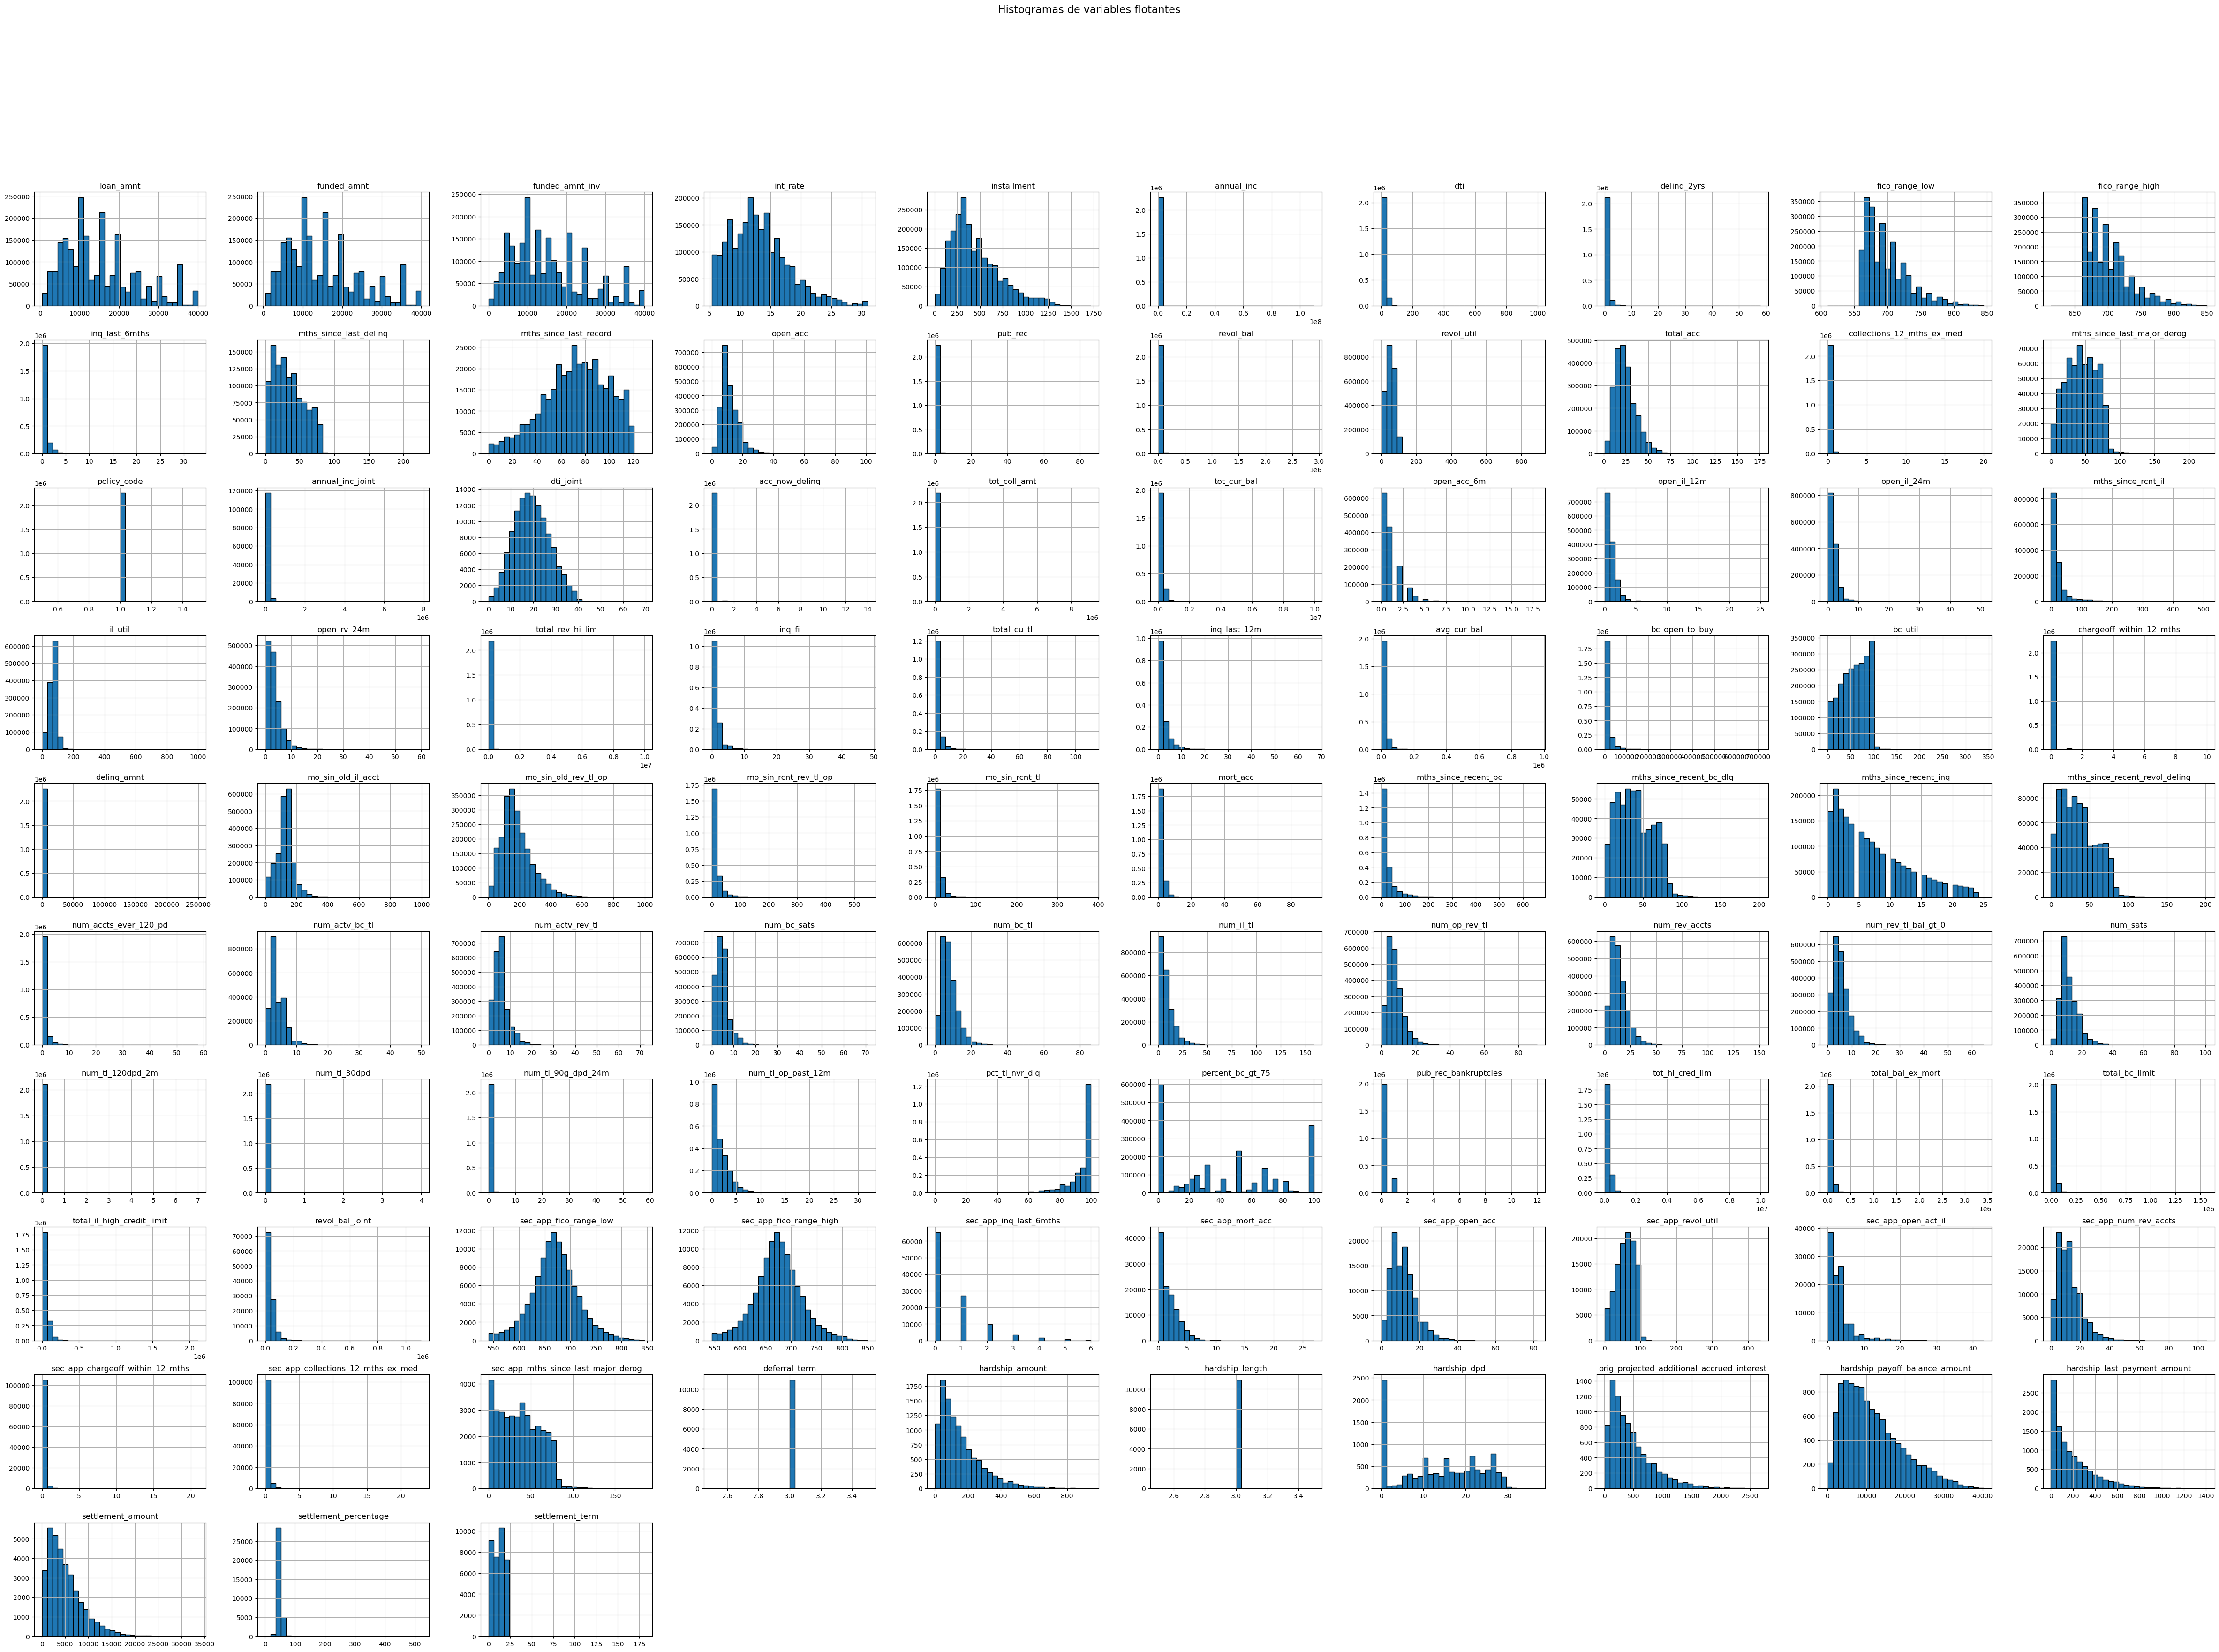

In [18]:
# --- Histogramas SOLO de variables flotantes ---
float_cols = df.select_dtypes(include=["float64"])  # selecciona solo columnas flotantes

float_cols.hist(bins=30, figsize=(60, 40), edgecolor="black")
plt.suptitle("Histogramas de variables flotantes", fontsize=16)
plt.show()


In [19]:
print(df.select_dtypes(include=["object"]).columns)
cat_cols = df.select_dtypes(include=["object"]).columns

Index(['id', 'term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'next_pymnt_d', 'last_credit_pull_d', 'application_type',
       'verification_status_joint', 'sec_app_earliest_cr_line',
       'hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status',
       'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date',
       'hardship_loan_status', 'disbursement_method',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date'],
      dtype='object')


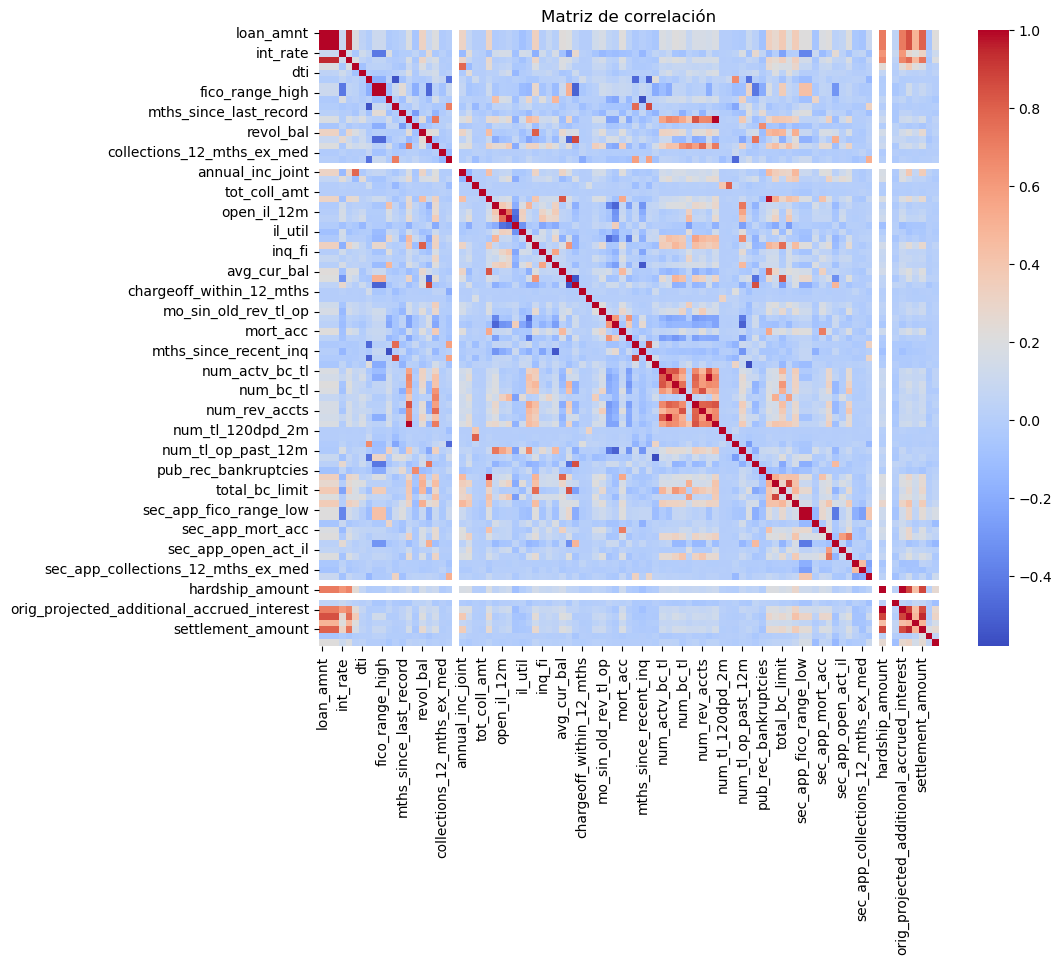

In [20]:
# --- 6. Matriz de correlación / Heatmap ---
plt.figure(figsize=(10,8))

corr = float_cols.corr()
sns.heatmap(corr, annot=False, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

In [21]:
df_copy = df.copy()

## Selección de variables numéricas

In [22]:
df_num = df_filtered.select_dtypes(include=["float64", "int64"])
df_cat = df_filtered.select_dtypes(include=["object"])
df_cat.drop(columns=["loan_status"], inplace=True, errors="ignore")

In [23]:
from sklearn.linear_model import Lasso

In [24]:
pipeLASSOnuevo = Pipeline([('scaler', StandardScaler()),
                         ("lasso", Lasso(alpha= 0.0001, max_iter=10000, tol= 0.0001))])

In [25]:
#pipeLASSOnuevo.fit(X_train, y_train)

In [26]:
"""lasso = Lasso().fit(X_trainRidge, y_trainRidge)
print("Training set score: {:.2f}".format(lasso.score(X_trainRidge, y_trainRidge)))
print("Test set score: {:.2f}".format(lasso.score(X_testRidge, y_testRidge)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))"""

'lasso = Lasso().fit(X_trainRidge, y_trainRidge)\nprint("Training set score: {:.2f}".format(lasso.score(X_trainRidge, y_trainRidge)))\nprint("Test set score: {:.2f}".format(lasso.score(X_testRidge, y_testRidge)))\nprint("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))'

In [27]:
import pandas as pd

# Todas las numéricas
num_cols = df_filtered.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Todas las categóricas (tipo object o string)
cat_cols = df_cat.select_dtypes(include=["object", "string"]).columns.tolist()

print("Numéricas:", num_cols)
print("Categóricas:", cat_cols)

Numéricas: ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'il_util', 'open_rv_24m', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'perc

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Numéricas: imputación + escalado
num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Categóricas: imputación + OneHot
cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="__MISSING__")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=True))
])

# ColumnTransformer con separación clara
prepro = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_cols),
        ("cat", cat_transformer, cat_cols)
    ],
    remainder="drop"
)


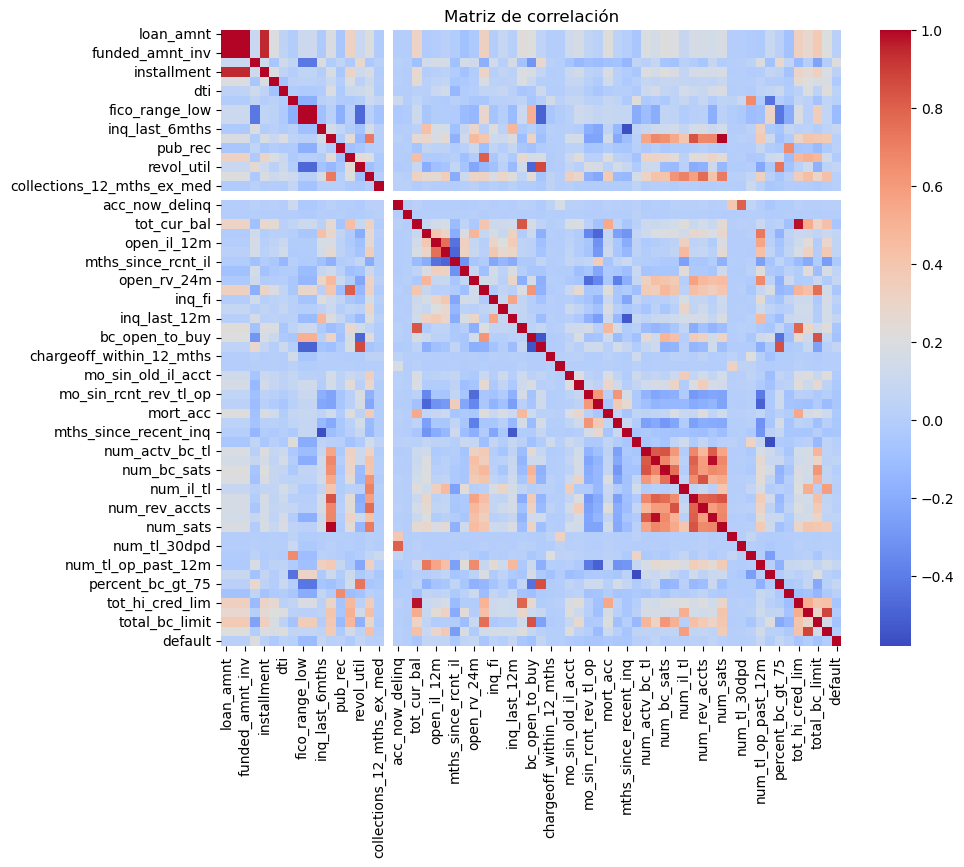

In [29]:
# --- 6. Matriz de correlación / Heatmap ---
plt.figure(figsize=(10,8))

corr = df_num.corr()
sns.heatmap(corr, annot=False, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

In [30]:
# ================== IMPORTS ==================
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report, roc_auc_score

In [31]:
# ================== 0) DATOS: X (numéricas) y y (target) ==================
# df_num: DataFrame SOLO con variables numéricas
# df_filtered['default']: variable objetivo (0/1)
X = df_num.drop(columns=["default"]).copy()
y = df_num.loc[X.index, "default"]

# Limpieza mínima: quita filas con NaN en X o en y
mask = X.notna().all(axis=1) & y.notna()
X = X.loc[mask]
y = y.loc[mask].astype(int)

In [32]:
# 1. Calcula la matriz de correlación de X (sin incluir default)
corr_matrix = X.corr().abs()

# 2. Crea máscara triangular superior (para no repetir pares)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# 3. Elimina columnas con correlación alta
umbral = 0.85
cols_drop = [column for column in upper.columns if any(upper[column] > umbral)]

print("Variables eliminadas por alta correlación:", cols_drop)

X_reduced = X.drop(columns=cols_drop)
X = X_reduced


Variables eliminadas por alta correlación: ['funded_amnt', 'funded_amnt_inv', 'installment', 'fico_range_high', 'bc_util', 'num_rev_tl_bal_gt_0', 'num_sats', 'tot_hi_cred_lim', 'total_bc_limit', 'total_il_high_credit_limit']


In [33]:
# ================== 1) SPLIT ESTRATIFICADO 80/20 ==================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

In [34]:
# ================== 2) PREPROCESADOR (numéricas) ==================
num_cols = X_train.columns.tolist()
prepro = ColumnTransformer(
    transformers=[
        ("num", Pipeline([
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler", StandardScaler())
        ]), num_cols)
    ],
    remainder="drop"
)

# ================== 3) SELECTOR L1 (ajusta C aquí) ==================
C_MANUAL = 0.0001          # <<< ajusta este valor (menor C = más regularización)
THRESH = 1e-8            # <<< umbral para "coeficientes ≠ 0" (puedes subir/bajar)

selector_l1 = SelectFromModel(
    LogisticRegression(
        penalty="l1", solver="saga", max_iter=2000,
        class_weight="balanced", n_jobs=-1, C=C_MANUAL
    ),
    threshold=THRESH
)

pipe_sel = Pipeline([
    ("prepro", prepro),
    ("sel", selector_l1)
])

# Entrenar selector
pipe_sel.fit(X_train, y_train)

# ================== 4) FEATURES SELECCIONADAS ==================
# Nombres de columnas tras el prepro
feat_names_trans = pipe_sel.named_steps["prepro"].get_feature_names_out()
mask_sel = pipe_sel.named_steps["sel"].get_support()
selected_trans = [f for f, keep in zip(feat_names_trans, mask_sel) if keep]

# Mapea a nombres originales (quita el prefijo 'num__')
selected_original = [name.split("__", 1)[1] if "__" in name else name
                     for name in selected_trans]

print(f"Nº de variables seleccionadas: {mask_sel.sum()}")
print("Primeras seleccionadas:", selected_original[:30])

# Matrices reducidas para modelado
X_train_sel = pipe_sel.transform(X_train)
X_test_sel  = pipe_sel.transform(X_test)

# ================== 5) EVALUACIÓN RÁPIDA (clasificador simple) ==================
clf_eval = LogisticRegression(max_iter=2000, class_weight="balanced", n_jobs=-1)
clf_eval.fit(X_train_sel, y_train)
y_pred  = clf_eval.predict(X_test_sel)
y_proba = clf_eval.predict_proba(X_test_sel)[:, 1]

print("\n=== Métricas en Test (con features seleccionadas) ===")
print(classification_report(y_test, y_pred, zero_division=0))
print("ROC AUC:", roc_auc_score(y_test, y_proba))


Nº de variables seleccionadas: 17
Primeras seleccionadas: ['int_rate', 'delinq_2yrs', 'fico_range_low', 'inq_last_6mths', 'pub_rec', 'tot_cur_bal', 'open_il_24m', 'il_util', 'open_rv_24m', 'total_rev_hi_lim', 'inq_last_12m', 'avg_cur_bal', 'bc_open_to_buy', 'mo_sin_rcnt_rev_tl_op', 'mths_since_recent_bc', 'mths_since_recent_inq', 'percent_bc_gt_75']

=== Métricas en Test (con features seleccionadas) ===
              precision    recall  f1-score   support

           0       0.95      0.65      0.77    182585
           1       0.15      0.64      0.24     17730

    accuracy                           0.64    200315
   macro avg       0.55      0.64      0.51    200315
weighted avg       0.88      0.64      0.72    200315

ROC AUC: 0.7001109895720945


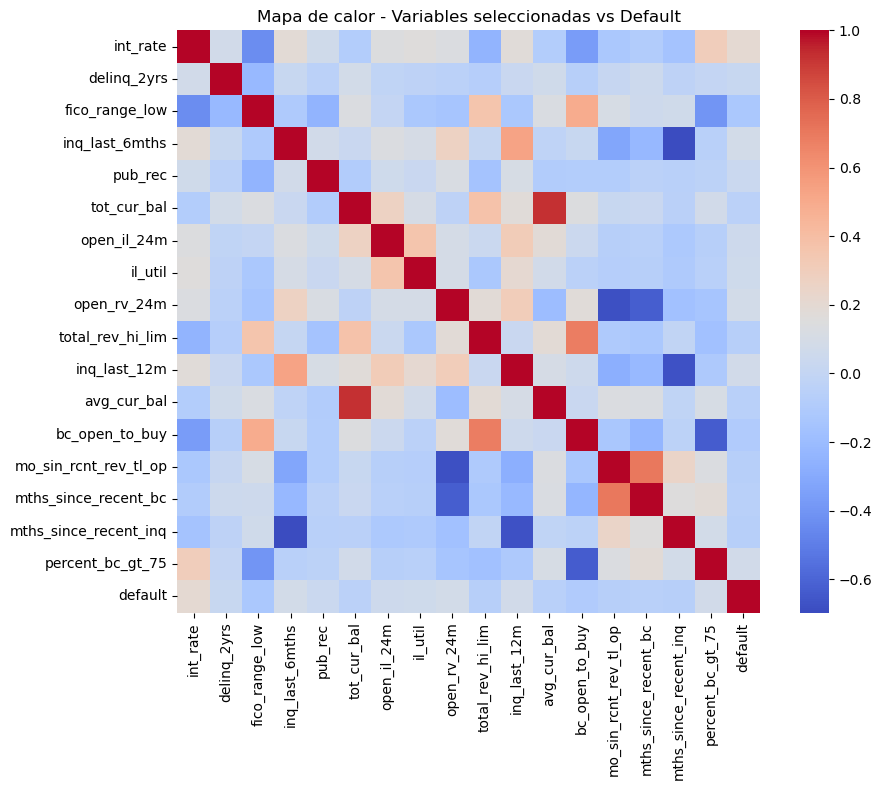

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- subset con las variables seleccionadas + target ---
df_corr = df_num[selected_original + ["default"]].copy()

# --- matriz de correlación ---
corr = df_corr.corr("spearman")

# --- plot ---
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=False, fmt=".2f", cmap="coolwarm",
    cbar=True, square=True
)
plt.title("Mapa de calor - Variables seleccionadas vs Default")
plt.tight_layout()
plt.show()


In [36]:
print(corr["default"].sort_values(ascending=False))

default                  1.000000
int_rate                 0.198951
inq_last_6mths           0.080798
open_rv_24m              0.080700
percent_bc_gt_75         0.077922
inq_last_12m             0.073978
il_util                  0.061321
open_il_24m              0.054554
pub_rec                  0.035547
delinq_2yrs              0.020189
tot_cur_bal             -0.045905
avg_cur_bal             -0.056275
mths_since_recent_bc    -0.057153
mths_since_recent_inq   -0.063826
mo_sin_rcnt_rev_tl_op   -0.064443
total_rev_hi_lim        -0.066409
bc_open_to_buy          -0.098337
fico_range_low          -0.122101
Name: default, dtype: float64


## Selección de variables categórricas


In [37]:
valid_cats = [col for col in cat_cols if df_cat[col].nunique() < 60]
print(valid_cats)
print(len(valid_cats))

['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'pymnt_plan', 'purpose', 'addr_state', 'initial_list_status', 'application_type', 'hardship_flag', 'disbursement_method']
13


In [38]:
df_cat

,term,grade,sub_grade,emp_length,home_ownership,verification_status,pymnt_plan,purpose,addr_state,initial_list_status,application_type,hardship_flag,disbursement_method
0,36 months,C,C4,10+ years,MORTGAGE,Not Verified,n,debt_consolidation,PA,w,Individual,N,Cash
1,36 months,C,C1,10+ years,MORTGAGE,Not Verified,n,small_business,SD,w,Individual,N,Cash
2,60 months,B,B4,10+ years,MORTGAGE,Not Verified,n,home_improvement,IL,w,Joint App,N,Cash
3,60 months,C,C5,10+ years,MORTGAGE,Source Verified,n,debt_consolidation,NJ,w,Individual,N,Cash
4,60 months,F,F1,3 years,MORTGAGE,Source Verified,n,major_purchase,PA,w,Individual,N,Cash
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260696,60 months,B,B3,9 years,MORTGAGE,Verified,n,debt_consolidation,CA,f,Individual,N,Cash
2260697,60 months,C,C4,6 years,RENT,Not Verified,n,debt_consolidation,FL,f,Individual,N,Cash
2260698,60 months,C,C4,10+ years,MORTGAGE,Verified,n,debt_consolidation,TX,w,Individual,N,Cash
2260699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# --- Preparación de datos ---
# df_pre: tu dataset ya filtrado a variables "pre" (sin post-evento) + 'default'
target = "default"
y = df_num[target].astype(int)
X = df_cat.copy()

# Identificar categóricas y numéricas
cat_cols = X.select_dtypes(include=["object","string","category"]).columns.tolist()
num_cols = [c for c in X.columns if c not in cat_cols]

# CatBoost requiere índices (posiciones) de las categóricas
cat_idx = [X.columns.get_loc(c) for c in cat_cols]

#Bota los nans}
X = X.dropna()
y = y.loc[X.index].astype(int)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)



# Pools (CatBoost maneja NaN; en categóricas usa strings)
train_pool = Pool(X_train, y_train, cat_features=cat_idx, feature_names=X.columns.tolist())
test_pool  = Pool(X_test,  y_test,  cat_features=cat_idx, feature_names=X.columns.tolist())

# --- Modelo CatBoost (simple y robusto) ---
model = CatBoostClassifier(
    iterations=600,
    depth=6,
    learning_rate=0.08,
    #loss_function="Logloss",
    eval_metric="AUC",
    auto_class_weights="Balanced",
    random_seed=42, verbose=100
)

model.fit(train_pool, eval_set=test_pool, use_best_model=True)



0:	test: 0.6830329	best: 0.6830329 (0)	total: 1.82s	remaining: 18m 13s
100:	test: 0.7137165	best: 0.7137165 (100)	total: 54s	remaining: 4m 26s
200:	test: 0.7147952	best: 0.7147952 (200)	total: 1m 44s	remaining: 3m 26s
300:	test: 0.7152330	best: 0.7152330 (300)	total: 2m 40s	remaining: 2m 39s
400:	test: 0.7153723	best: 0.7153723 (400)	total: 3m 34s	remaining: 1m 46s
500:	test: 0.7154313	best: 0.7154448 (468)	total: 4m 35s	remaining: 54.5s
599:	test: 0.7154480	best: 0.7154582 (580)	total: 5m 27s	remaining: 0us

bestTest = 0.7154581578
bestIteration = 580

Shrink model to first 581 iterations.


In [40]:
# Vector de importancias (una por feature en X.columns)
imp_predchg = model.get_feature_importance(train_pool, type="PredictionValuesChange")
fi_predchg = pd.DataFrame({"feature": X.columns, "importance": imp_predchg}) \
              .sort_values("importance", ascending=False)
# Top categóricas únicamente
fi_cat = fi_predchg[fi_predchg["feature"].isin(cat_cols)].reset_index(drop=True)
print(fi_cat.head(20))

                feature  importance
0                 grade   26.301877
1             sub_grade   23.926953
2   disbursement_method   19.592102
3      application_type    6.789882
4        home_ownership    4.438947
5   initial_list_status    4.394937
6   verification_status    3.818736
7                  term    2.958608
8            addr_state    2.771214
9               purpose    2.123213
10           emp_length    1.624043
11        hardship_flag    1.030252
12           pymnt_plan    0.229238


In [41]:
top10_cat_features = fi_cat["feature"].head(10).tolist()
print(top10_cat_features)

['grade', 'sub_grade', 'disbursement_method', 'application_type', 'home_ownership', 'initial_list_status', 'verification_status', 'term', 'addr_state', 'purpose']


In [42]:
imp_losschg = model.get_feature_importance(train_pool, type="LossFunctionChange")
fi_losschg = pd.DataFrame({"feature": X.columns, "importance": imp_losschg}) \
              .sort_values("importance", ascending=False)
fi_cat_loss = fi_losschg[fi_losschg["feature"].isin(cat_cols)]
print(fi_cat_loss.head(20))


                feature  importance
2             sub_grade    0.007366
1                 grade    0.007084
12  disbursement_method    0.003739
10     application_type    0.002165
9   initial_list_status    0.001814
4        home_ownership    0.001090
5   verification_status    0.000957
8            addr_state    0.000738
7               purpose    0.000471
3            emp_length    0.000412
0                  term    0.000356
11        hardship_flag    0.000053
6            pymnt_plan    0.000002


In [43]:
# get_feature_importance(..., type="ShapValues") retorna matriz (n_samples, n_features+1)
# La última columna suele ser el valor base; usamos la media absoluta por feature.
shap_vals = model.get_feature_importance(train_pool, type="ShapValues")
shap_abs_mean = np.abs(shap_vals[:, :-1]).mean(axis=0)  # excluir base
fi_shap = pd.DataFrame({"feature": X.columns, "importance": shap_abs_mean}) \
           .sort_values("importance", ascending=False)
fi_cat_shap = fi_shap[fi_shap["feature"].isin(cat_cols)]
print(fi_cat_shap.head(20))


                feature  importance
2             sub_grade    0.289448
1                 grade    0.252767
12  disbursement_method    0.137565
9   initial_list_status    0.112546
5   verification_status    0.097655
4        home_ownership    0.092330
10     application_type    0.074587
8            addr_state    0.054420
7               purpose    0.040758
0                  term    0.034967
3            emp_length    0.032707
11        hardship_flag    0.002755
6            pymnt_plan    0.000492


In [44]:
df_lihki = df_copy[['loan_amnt', 'int_rate', 'fico_range_high', 'emp_length', 'annual_inc', 'purpose', 'home_ownership', 'dti', 'addr_state','default']]
df_copy = df_copy[['loan_amnt', 'int_rate', 'fico_range_low', 'open_rv_24m'
                   , 'grade', 'sub_grade', 'disbursement_method', 'application_type', 'initial_list_status', 'home_ownership', 'verification_status', 'term', 'addr_state'
                   ,'default']]

In [45]:
df_copy

,loan_amnt,int_rate,fico_range_low,open_rv_24m,grade,sub_grade,disbursement_method,application_type,initial_list_status,home_ownership,verification_status,term,addr_state,default
0,3600.0,13.99,675.0,3.0,C,C4,Cash,Individual,w,MORTGAGE,Not Verified,36 months,PA,0
1,24700.0,11.99,715.0,3.0,C,C1,Cash,Individual,w,MORTGAGE,Not Verified,36 months,SD,0
2,20000.0,10.78,695.0,2.0,B,B4,Cash,Joint App,w,MORTGAGE,Not Verified,60 months,IL,0
3,35000.0,14.85,785.0,1.0,C,C5,Cash,Individual,w,MORTGAGE,Source Verified,60 months,NJ,0
4,10400.0,22.45,695.0,7.0,F,F1,Cash,Individual,w,MORTGAGE,Source Verified,60 months,PA,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260696,40000.0,10.49,705.0,0.0,B,B3,Cash,Individual,f,MORTGAGE,Verified,60 months,CA,0
2260697,24000.0,14.49,660.0,5.0,C,C4,Cash,Individual,f,RENT,Not Verified,60 months,FL,1
2260698,14000.0,14.49,660.0,1.0,C,C4,Cash,Individual,w,MORTGAGE,Verified,60 months,TX,0
2260699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


## Escalado

In [46]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 14 columns):
 #   Column               Dtype  
---  ------               -----  
 0   loan_amnt            float64
 1   int_rate             float64
 2   fico_range_low       float64
 3   open_rv_24m          float64
 4   grade                object 
 5   sub_grade            object 
 6   disbursement_method  object 
 7   application_type     object 
 8   initial_list_status  object 
 9   home_ownership       object 
 10  verification_status  object 
 11  term                 object 
 12  addr_state           object 
 13  default              int64  
dtypes: float64(4), int64(1), object(9)
memory usage: 241.5+ MB


In [47]:
# 1. Identificar columnas numéricas
num_features = df_copy.select_dtypes(include=["float64"]).columns

# 2. Escalador
scaler = StandardScaler()
scaled = scaler.fit_transform(df_copy[num_features])

# 3. Reemplazar en el DataFrame
df_copy[num_features] = scaled

In [48]:
df_copy = df_copy.dropna()

## Codificación de categóricas

In [49]:
cat_features = [col for col in df_copy.columns if df_copy[col].dtype == 'object']

encoder = OneHotEncoder(drop="first", handle_unknown="ignore", sparse_output=False)

encoded = encoder.fit_transform(df_copy[cat_features])

# Convertimos a DataFrame con nombres de columnas
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(cat_features), index=df_copy.index)

# Unimos al dataset original (quitando las categóricas originales)
df_encoded = df_copy.drop(columns=cat_features).join(encoded_df)

In [50]:
df_encoded

,loan_amnt,int_rate,fico_range_low,open_rv_24m,default,grade_B,grade_C,grade_D,grade_E,grade_F,...,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
0,-1.245553,0.185668,-0.714570,0.096298,0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.050361,-0.228228,0.497171,0.096298,0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.538949,-0.478635,-0.108699,-0.288775,0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.171114,0.363643,2.617717,-0.673848,0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.505637,1.936446,-0.108699,1.636590,0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260694,0.974193,-0.062670,-1.017505,-0.288775,0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2260695,0.974193,-0.538650,-0.108699,-0.288775,0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2260696,2.715170,-0.538650,0.194236,-1.058921,0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2260697,0.974193,0.289141,-1.168972,0.866444,1,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## División del train y test por clase

In [51]:
df_copy.head()

,loan_amnt,int_rate,fico_range_low,open_rv_24m,grade,sub_grade,disbursement_method,application_type,initial_list_status,home_ownership,verification_status,term,addr_state,default
0,-1.245553,0.185668,-0.714570,0.096298,C,C4,Cash,Individual,w,MORTGAGE,Not Verified,36 months,PA,0
1,1.050361,-0.228228,0.497171,0.096298,C,C1,Cash,Individual,w,MORTGAGE,Not Verified,36 months,SD,0
2,0.538949,-0.478635,-0.108699,-0.288775,B,B4,Cash,Joint App,w,MORTGAGE,Not Verified,60 months,IL,0
3,2.171114,0.363643,2.617717,-0.673848,C,C5,Cash,Individual,w,MORTGAGE,Source Verified,60 months,NJ,0
4,-0.505637,1.936446,-0.108699,1.636590,F,F1,Cash,Individual,w,MORTGAGE,Source Verified,60 months,PA,0


In [52]:
# Definimos variables predictoras (X) y target (y)
X = df_encoded.drop(columns=["default"])
y = df_encoded["default"]

# División 80/20 con estratificación por clase
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)


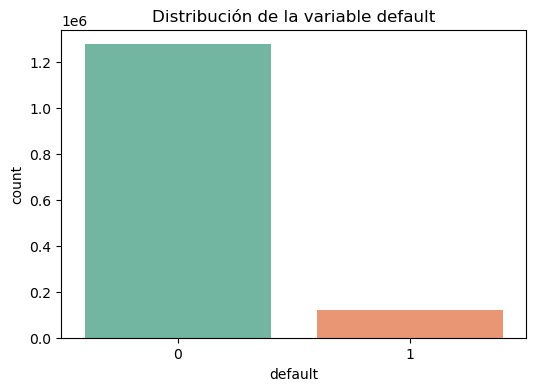

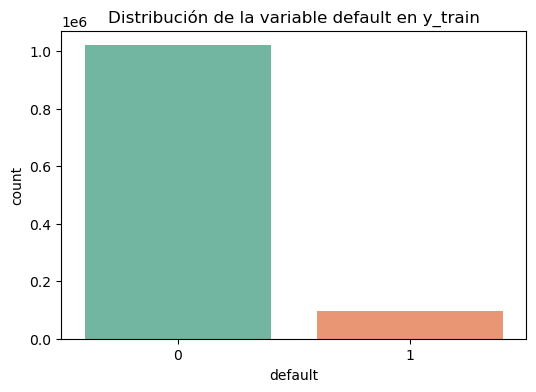

In [53]:
plt.figure(figsize=(6,4))
sns.countplot(data=df_encoded, x="default", palette="Set2")
plt.title("Distribución de la variable default")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x=y_train, palette="Set2")
plt.title("Distribución de la variable default en y_train")
plt.show()

## Modelado con Scikit learn

In [54]:
import numpy as np
import pandas as pd
import time

from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)

In [55]:
pipe = Pipeline(steps=[
    #("scaler", StandardScaler()),   # X ya está escalada
    ("clf", MLPClassifier(random_state=42, early_stopping=True))
])
param_grid = {
    "clf__hidden_layer_sizes": [(10,), (50,), (100,)],
    "clf__alpha": [0.0001, 0.001, 0.01],
    "clf__max_iter": [100, 200],
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
scoring = {
    "accuracy": "accuracy",
    "precision": "precision",
    "recall": "recall",
    "f1": "f1",
    "roc_auc": "roc_auc",
}

grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring=scoring,
    refit="f1",          # el mejor modelo se elige por F1
    cv=cv,
    n_jobs=6,
    verbose=1
)

In [56]:
from tqdm import tqdm
from sklearn.model_selection import ParameterGrid, StratifiedKFold
from tqdm_joblib import tqdm_joblib

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring=scoring,
    refit="roc_auc",          # el mejor modelo se elige por auc
    cv=cv,
    n_jobs=6,
    verbose=1
)

t0 = time.perf_counter()

with tqdm_joblib(tqdm(desc="GridSearch MLP", total=len(list(ParameterGrid(param_grid))) * cv.get_n_splits())):
    grid.fit(X_train, y_train)

elapsed = time.perf_counter() - t0


GridSearch MLP:   0%|          | 0/54 [00:00<?, ?it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

Fitting 3 folds for each of 18 candidates, totalling 54 fits


In [57]:
print(f"GridSearch completed in {elapsed:.2f} seconds")
print(f"GridSearch completed in {elapsed/60:.2f} minutes")

GridSearch completed in 808.55 seconds
GridSearch completed in 13.48 minutes


In [58]:
print("Mejores hiperparámetros:", grid.best_params_)

Mejores hiperparámetros: {'clf__alpha': 0.01, 'clf__hidden_layer_sizes': (100,), 'clf__max_iter': 100}


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# 1) VALID a partir de TRAIN
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2,
                                            stratify=y_train, random_state=0)

# 2) Reentrenar el MEJOR pipeline en TRAIN interno
best = grid.best_estimator_.fit(X_tr, y_tr)

# 3) Probabilidades en VALID y umbral óptimo por F1
proba_val = best.predict_proba(X_val)[:, 1]
prec, rec, thr = precision_recall_curve(y_val, proba_val)
f1s  = 2*prec[:-1]*rec[:-1]/(prec[:-1]+rec[:-1]+1e-9)  # len(thr)=len(prec)-1
t_f1 = float(thr[np.argmax(f1s)])
print("Umbral óptimo (F1):", t_f1)

# 4) Reentrenar con TODO el TRAIN y evalúe en TEST con ese umbral
final_model = grid.best_estimator_.fit(X_train, y_train)
proba_test  = final_model.predict_proba(X_test)[:, 1]
y_pred_t    = (proba_test >= t_f1).astype(int)

print("AUC      :", roc_auc_score(y_test, proba_test))  # no depende del umbral
print("Accuracy :", accuracy_score(y_test, y_pred_t))
print("Precision:", precision_score(y_test, y_pred_t, zero_division=0))
print("Recall   :", recall_score(y_test, y_pred_t, zero_division=0))
print("F1-score :", f1_score(y_test, y_pred_t, zero_division=0))


Umbral óptimo (F1): 0.14898812757371735


GridSearch MLP:   0%|          | 0/54 [18:06<?, ?it/s]

AUC      : 0.7675203351629311
Accuracy : 0.843278070188019
Precision: 0.24667438569406921
Recall   : 0.3991257285595337
F1-score : 0.3049057803927805


In [60]:
import numpy as np
from sklearn.metrics import precision_recall_curve

# y_val: etiquetas reales 0/1 del set de validación
# proba_val: probabilidades del modelo (clase 1) en VALID
prec, rec, thr = precision_recall_curve(y_val, proba_val)  # len(thr)=len(prec)-1

# Alinear con los umbrales
prec_ = prec[:-1]
rec_  = rec[:-1]
thr_  = thr

# Reconstrucción de TP/FP/TN para accuracy
P  = (y_val == 1).sum()
Nn = (y_val == 0).sum()
tp = rec_ * P
fp = tp * (1.0/np.clip(prec_, 1e-12, None) - 1.0)
fp = np.clip(fp, 0, Nn)
tn = Nn - fp
acc_s = (tp + tn) / (P + Nn)

# F1 por umbral
f1_s = 2*prec_*rec_ / (prec_ + rec_ + 1e-12)

# Umbrales óptimos
t_accuracy  = float(thr_[np.nanargmax(acc_s)])
t_precision = float(thr_[np.nanargmax(prec_)])
t_recall    = float(thr_[np.nanargmax(rec_)])
t_f1        = float(thr_[np.nanargmax(f1_s)])

print({
    "t_accuracy":  t_accuracy,
    "t_precision": t_precision,
    "t_recall":    t_recall,
    "t_f1":        t_f1
})


{'t_accuracy': 0.597859216156902, 't_precision': 0.7011071258075341, 't_recall': 0.0006319686375899121, 't_f1': 0.14898812757371735}



=== Métricas en Test ===
Accuracy : 0.8433
Precision: 0.2467
Recall   : 0.3991
F1-score : 0.3049
ROC AUC  : 0.7675

=== Classification report ===
              precision    recall  f1-score   support

           0       0.94      0.89      0.91    254888
           1       0.25      0.40      0.30     24020

    accuracy                           0.84    278908
   macro avg       0.59      0.64      0.61    278908
weighted avg       0.88      0.84      0.86    278908


=== Matriz de Confusión ===
        Pred_0  Pred_1
Real_0  225610   29278
Real_1   14433    9587

=== Top resultados de CV (ordenado por F1) ===
   param_clf__hidden_layer_sizes  param_clf__alpha  param_clf__max_iter  \
2                          (50,)            0.0001                  100   
8                          (50,)            0.0010                  100   
9                          (50,)            0.0010                  200   
11                        (100,)            0.0010                  200   
10   

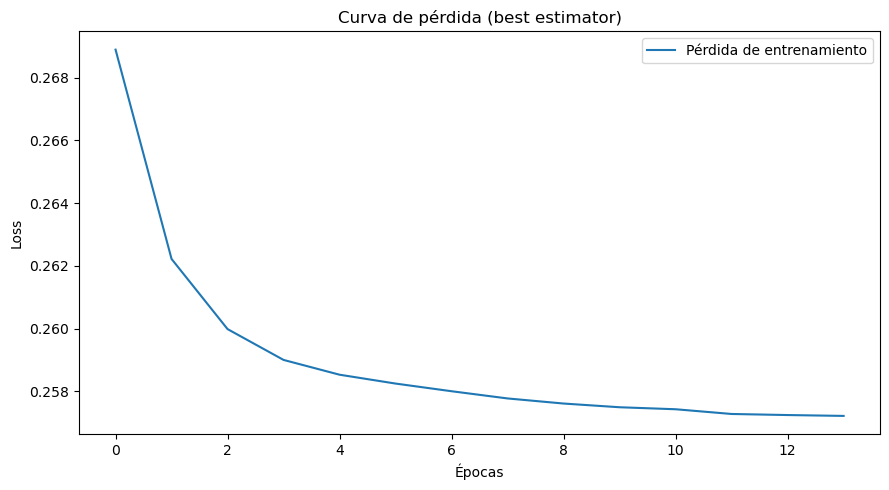

In [61]:
# ===== EVALUACIÓN EN TEST =====
best = grid.best_estimator_
#y_pred  = best.predict(X_test)
y_proba = best.predict_proba(X_test)[:, 1]
y_pred    = (y_proba >= t_f1).astype(int)

acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec  = recall_score(y_test, y_pred, zero_division=0)
f1   = f1_score(y_test, y_pred, zero_division=0)
auc  = roc_auc_score(y_test, y_proba)

print("\n=== Métricas en Test ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"ROC AUC  : {auc:.4f}")

print("\n=== Classification report ===")
print(classification_report(y_test, y_pred, zero_division=0))

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=["Real_0", "Real_1"], columns=["Pred_0", "Pred_1"])
print("\n=== Matriz de Confusión ===")
print(cm_df)

# ===== TOP CV RESULTS =====
cv_results = pd.DataFrame(grid.cv_results_)
cols = [
    "param_clf__hidden_layer_sizes", "param_clf__alpha", "param_clf__max_iter",
    "mean_test_accuracy", "mean_test_precision", "mean_test_recall",
    "mean_test_f1", "mean_test_roc_auc", "rank_test_f1"
]
print("\n=== Top resultados de CV (ordenado por F1) ===")
print(cv_results[cols].sort_values("rank_test_f1").head(10))

# ===== CURVA DE PÉRDIDA (del mejor MLP) =====
mlp = best.named_steps["clf"]  # toma el clasificador dentro del pipeline
if hasattr(mlp, "loss_curve_"):
    plt.figure(figsize=(9,5))
    plt.plot(mlp.loss_curve_, label="Pérdida de entrenamiento")
    plt.title("Curva de pérdida (best estimator)")
    plt.xlabel("Épocas")
    plt.ylabel("Loss")
    plt.legend()
    plt.tight_layout()
    plt.show()